# Mathematical modeling of TME dynamics highlights that dual modulation of CD8+ T cell activation and inhibition by MDSCs are necessary for tumor shrinkage

In [1]:
#load packages
using DifferentialEquations
using NonlinearSolve
using Plots; pyplot()
using Random
using Statistics 
using ColorSchemes
using Colors
using DataFrames

In [2]:
#define ODE model
function ode_system(du,u,p,t)
    T,MDSC,NK,CTL = u
    α₂,α₃,ζ₂,α₁,η,β₁,β₂,ζ₁,α₄,α₅,β₃,ζ₃,α₆,α₇,β₄,ζ₄ = p
   
# Cancer cells (tumor)
    du[1] = dT = α₁*T*log(max(η/T,1)) - β₁*T*NK - β₂*T*CTL - ζ₁*T
 # MDSCs 
    du[2] = dMDSC = α₂ + α₃*T/(γ₁+(T)) - ζ₂*MDSC 
 # NK cells
    du[3] = dNK = α₄ + α₅*(T^2)/(γ₂+(T^2)) - β₃*MDSC*NK - ζ₃*NK 
 # CTL cells
    du[4] = dCTL = α₆*T*NK + α₇*(T^2)/(γ₃+(T^2)) - β₄*MDSC*CTL - ζ₄*CTL
end

ode_system (generic function with 1 method)

In [3]:
#set numerical solution algorithm
alg_ODE = Tsit5()

#set model parameters (no treatment)
α₂ = 5.0*(10.0^2.0) #MDSCs production rate
α₃ = (10.0^8.0) #MDSCs expansion coefficient 
ζ₂ = 0.2 #MDSCs death rate

α₁ = 10.0^(-1.0) #tumor growth rate
η = 10.0^7.0 #tumor maximum size
β₁ = 6.0*(10.0^(-4.0)) #tumor cells kill rate by NK cells
β₂ = 7.0*(10.0^(-4.0)) #tumor cells kill rate by T cells
ζ₁ = 0.0 #tumor cell death rate

α₄ = 5.0*(10.0^1.0) #NK cells production rate
α₅ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
β₃ = 4*(10.0^(-5.0)) #NK cells inactivation rate by MDSCs
ζ₃ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₆ = 4.0*(10.0^(-3.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₇ = 10.0^(-1.0) #CTL expansion coefficient 
β₄ = (10.0^(-4.0)) #CTL inactivation rate by MDSCs
ζ₄ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

tspan = (0.0,60.0)
uss_new = [234.52607557161835;2511.7148454521493;352.93622128903235;1219.5854955705156]
p_new = (α₂,α₃,ζ₂,α₁,η,β₁,β₂,ζ₁,α₄,α₅,β₃,ζ₃,α₆,α₇,β₄,ζ₄)

(500.0, 1.0e8, 0.2, 0.1, 1.0e7, 0.0006000000000000001, 0.0007, 0.0, 50.0, 0.025000000000000005, 4.0e-5, 0.04120000000000001, 0.004, 0.1, 0.0001, 0.020000000000000004)

In [4]:
#set model parameters (with treatment: β₁, β₄, and/or α₆) 

α₆ = α₆ * 1.4 #CTL stimulation as a result of tumor-NK cell interaction 
β₄ = β₄ * 0.38 #CTL inactivation rate by MDSCs

β₁ = β₁ * 2.0 #tumor cells kill rate by NK cells

p_treat_new = (α₂,α₃,ζ₂,α₁,η,β₁,β₂,ζ₁,α₄,α₅,β₃,ζ₃,α₆,α₇,β₄,ζ₄)

(500.0, 1.0e8, 0.2, 0.1, 1.0e7, 0.0012000000000000001, 0.0007, 0.0, 50.0, 0.025000000000000005, 4.0e-5, 0.04120000000000001, 0.0056, 0.1, 3.8e-5, 0.020000000000000004)

In [5]:
problem_uss_no_new = ODEProblem(ode_system,uss_new,tspan,p_new) #no treatment
problem_uss_with_new = ODEProblem(ode_system,uss_new,tspan,p_treat_new) #with treatment

sol_uss_no_new = solve(problem_uss_no_new,alg_ODE)
sol_uss_with_new = solve(problem_uss_with_new,alg_ODE)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 23-element Vector{Float64}:
  0.0
  0.14265232788106436
  0.6115954731668793
  1.267300855253983
  2.0491994388375163
  3.0907996021042976
  4.48160237265728
  6.161405529685927
  7.860938835564284
  9.878017970278359
 12.219617431345544
 15.004085598343456
 18.139671484928492
 21.39091539689861
 24.968743336879342
 28.251378451875407
 32.74403202602783
 36.85318992533335
 41.63702719131227
 46.91826817839334
 52.22846809711834
 58.92505542797291
 60.0
u: 23-element Vector{Vector{Float64}}:
 [234.52607557161835, 2511.7148454521493, 352.93622128903235, 1219.5854955705156]
 [227.10530116557106, 2511.710004976635, 352.93623676705175, 1264.222561806457]
 [199.25989926301702, 2511.6163907751907, 352.9365401157233, 1390.1117387831844]
 [158.47604514088238, 2511.284056272493, 352.9387468171948, 1511.489314836353]
 [116.80166976042678, 2510.6364303346486, 352.9462673376694, 1582.6777085424892]
 [78.43541987219471, 25

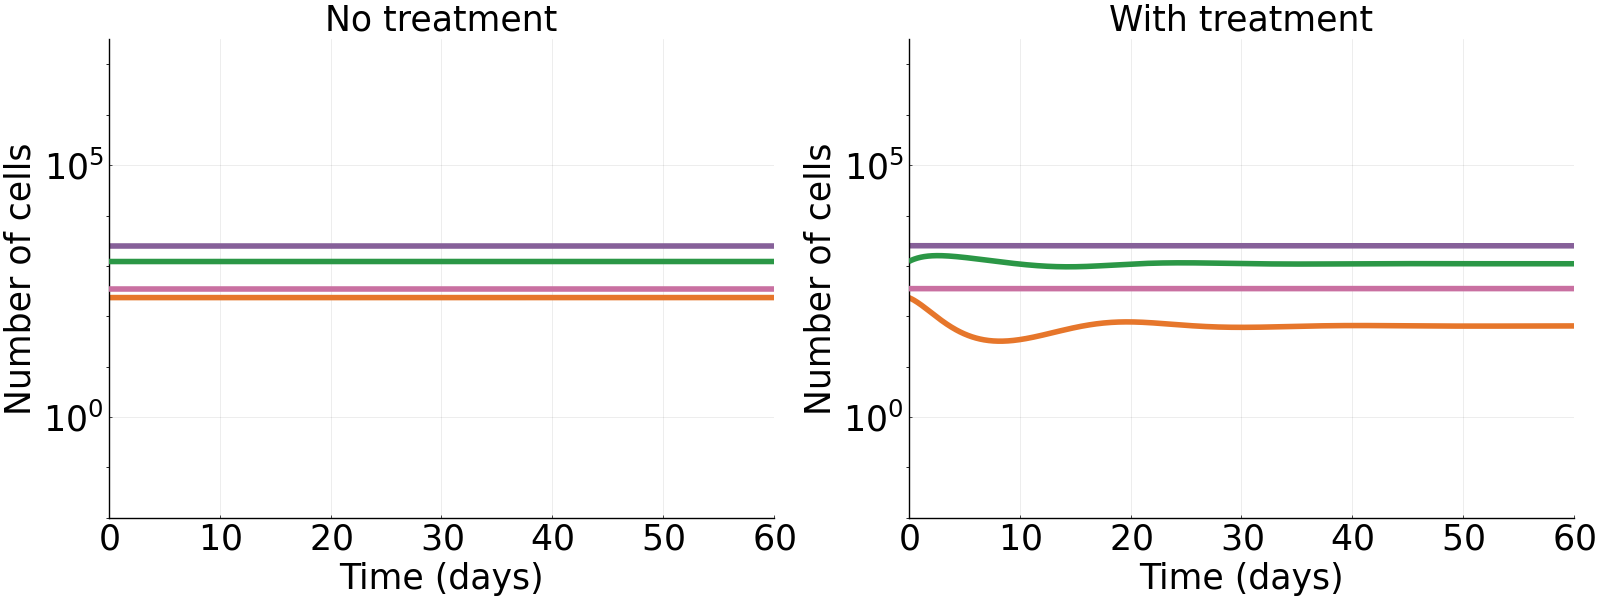

In [6]:
#plot results
l = @layout [a b]
a = plot(sol_uss_no_new, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = ["#e6762b" "#866099" "#c970a1" "#2b9746"], alpha = [1 1 1 1], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "No treatment",titlefontsize=25)
b = plot(sol_uss_with_new, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = ["#e6762b" "#866099" "#c970a1" "#2b9746"], alpha = [1 1 1 1], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "With treatment",titlefontsize=25)
plot(a, b, layout = l,size =(1600,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25), font = "Ariel")

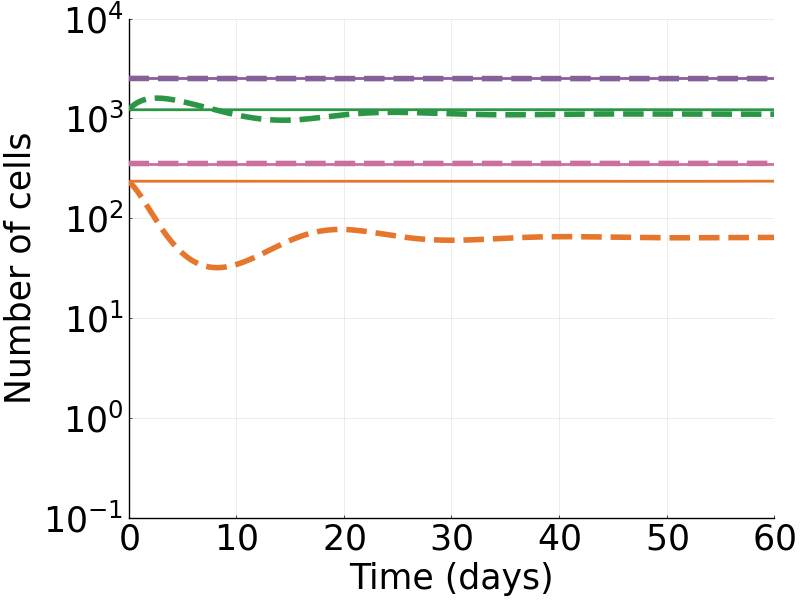

In [7]:
#plot results
plot()
plot!(sol_uss_no_new, lw = 2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.1,10^4), color = ["#e6762b" "#866099" "#c970a1" "#2b9746"], alpha = [1 1 1 1], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
a1 = plot!(sol_uss_with_new, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.1,10^4), style = :dash, color = ["#e6762b" "#866099" "#c970a1" "#2b9746"], alpha = [1 1 1 1], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
plot(a1, size =(800,600),xlims = (0,60),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25), font = "Ariel")

In [8]:
#define stochastic noise for stochastic differential equation
W = WienerProcess(0.0,0.0,0.0)

function σfunction_nodelay(du,u,p,t)
  du[1] = 15
  du[2] = 15
  du[3] = 15
  du[4] = 15
end

σfunction_nodelay (generic function with 1 method)

In [9]:
#define conditions for simulation to end
function condition(u,t,integrator) 
  u[1] < 1.0
end

floor_event = DiscreteCallback(condition, terminate!)

DiscreteCallback{typeof(condition), typeof(terminate!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}(condition, SciMLBase.terminate!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, Bool[1, 1])

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/0XOAI/src/retcodes.jl:354
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/0XOAI/src/retcodes.jl:354
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/0XOAI/src/retcodes.jl:354
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia 

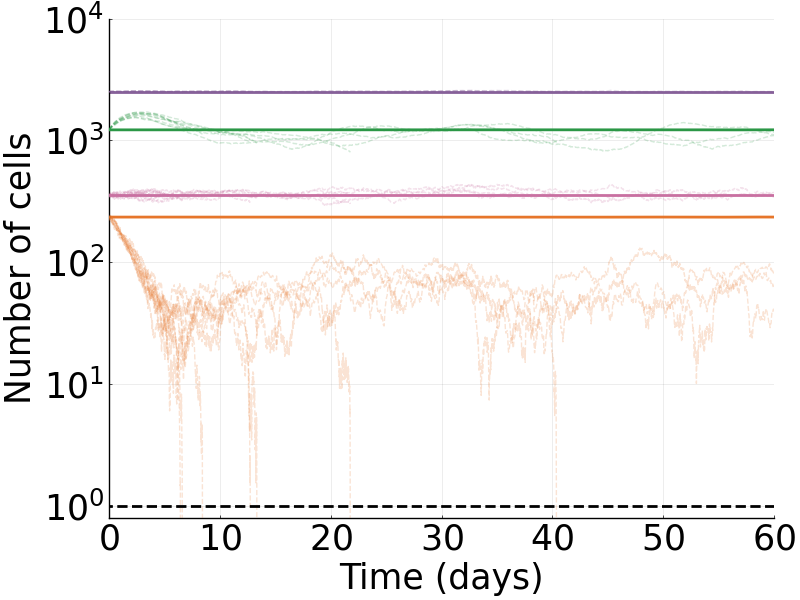

┌ Warning: Invalid negative or zero value -0.7750239316552171 found at series index 747 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/io9zQ/src/utils.jl:106
┌ Warning: Invalid negative or zero value -0.24988103265194292 found at series index 2331 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/io9zQ/src/utils.jl:106
┌ Warning: Invalid negative or zero value -0.6190802536406084 found at series index 1027 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/io9zQ/src/utils.jl:106


In [10]:
#stochastic simulations
plot()
number_of_traj = 10 
tumorsuccess = 0.0
threshold = 1.0

meanofsuccessfulltumors = 0.0;

ending_values = zeros(4,number_of_traj)

plot!(sol_uss_no_new, lw = 2, yaxis=:log, size =(1600/2,600), font = "Ariel", ylims = (0.8,10^4), color = ["#e6762b" "#866099" "#c970a1" "#2b9746"], alpha = [1 1 1 1], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)


for i = 1:number_of_traj
    
    problem_uss_with_new = SDEProblem(ode_system,σfunction_nodelay,uss_new,tspan,p_treat_new,noise=W)
    sol = solve(problem_uss_with_new,SOSRI(),callback=floor_event)
    
    A = minimum(sol[1,:])  

    if A ≥ threshold
        tumorsuccess = tumorsuccess + 1
        meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
        plot!(sol, style = :dash, width= 1, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.8,10^4), color = ["#e6762b" "#866099" "#c970a1" "#2b9746"], alpha = [0.2 0.2 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,titlefontsize=25) 
        ending_values[:,i] = last(sol)
    else
        for j in 1:length(sol[1,:])
            global BB = j
            if sol[1,j] < threshold
                break
            end
        end
        plot!(sol, style = :dash, width = 1, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,60), ylims = (0.8,10^4), color = ["#e6762b" "#866099" "#c970a1" "#2b9746"], alpha = [0.2 0.2 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,titlefontsize=25)
        ending_values[:,i] = last(sol)
        ending_values[1,i] = 0.0
    end
end

hline!([1.0], width = 2, color=:black, linestyle=:dash)
plot!()

